In [1]:
import numpy as np

# 1. MEAN & CENTROID
# ---------------------------------------------------------
# MEAN: The mathematical average of a list of numbers.
# Formula: Sum of all values / Number of values
# CENTROID: The "center" point of a cluster in multi-dimensional space.

data_points = np.array([
    [20, 100], # Customer 1: [Age, Spending]
    [30, 200], # Customer 2: [Age, Spending]
    [40, 300]  # Customer 3: [Age, Spending]
])

# Calculating Centroid (Mean of columns)
centroid = np.mean(data_points, axis=0) 
# Result: [30.0, 200.0] -> This is the central point of this group.


# 2. EUCLIDEAN DISTANCE [00:28:46]
# ---------------------------------------------------------
# Definition: Measures the straight-line distance between two points.
# Used to determine 'similarity'—smaller distance means more similar.
# Formula: sqrt((x2 - x1)^2 + (y2 - y1)^2)

def calculate_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Example: Distance between Customer 1 and the Centroid
dist = calculate_distance(data_points[0], centroid)
# Logic: If distance is small, the customer belongs to this cluster. 


# 3. VARIANCE & SPREAD
# ---------------------------------------------------------
# SPREAD: How far apart data points are from the Mean.
# VARIANCE: Mathematical measure of the spread.
# High Variance = Data is widely scattered (High information/noise).
# Low Variance = Data is consistent (Points are close to Mean).
# Formula: Sum of (Value - Mean)^2 / Total Values 

spending = np.array([100, 120, 130, 150, 50])
variance = np.var(spending)
# Square is used in the formula to keep all values positive. 


# 4. LINEAR ALGEBRA - VECTORS & PCA 
# ---------------------------------------------------------
# VECTOR: Like an arrow pointing in a direction of change.
# PCA (Principal Component Analysis):
# - A technique to reduce "Dimensions" (Columns).
# - It finds the directions (Vectors) with the HIGHEST Variance.
# - It compresses data (e.g., 10 columns into 2) while keeping the 
#   most important patterns (The "Principal Components"). 


# 5. KEY PROJECT STEPS (SUMMARY FOR INTERVIEWS) 
# ---------------------------------------------------------
# Step 1: Load & Understand (Check shapes and missing values).
# Step 2: Pre-processing (Label Encoding: Text -> Numbers). 
# Step 3: Feature Scaling (Standardizing ranges so big numbers don't dominate).
# Step 4: Split Data (80% Training, 20% Testing).
# Step 5: Model Training (Fitting the data).
# Step 6: Evaluation (Confusion Matrix & Accuracy Score).

print(f"Centroid of data: {centroid}")
print(f"Calculated Variance: {variance}")

Centroid of data: [ 30. 200.]
Calculated Variance: 1160.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


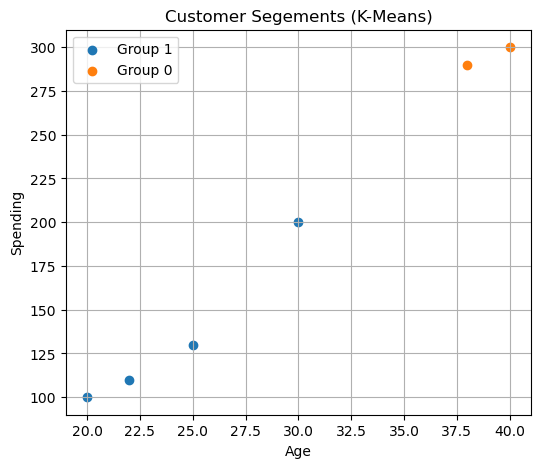

  Customer  Age  Spending  Group
0     Riya   20       100      1
1     Aman   30       200      1
2   Faizan   40       300      0
3     Neha   22       110      1
4    Imran   38       290      0
5    Sneha   25       130      1


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = {
    'Customer':['Riya','Aman','Faizan','Neha','Imran','Sneha'],
    'Age' : [20,30,40,22,38,25],
    'Spending' : [100,200,300,110,290,130]
}
df = pd.DataFrame(data)

X = df[['Age','Spending']]
model = KMeans(n_clusters=2,random_state = 42,n_init = 10)

df['Group'] = model.fit_predict(X)

plt.figure(figsize=(6,5))
for group in df['Group'].unique():
    group_data = df[df['Group']==group]
    plt.scatter(group_data['Age'],group_data['Spending'],label=f'Group {group}')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('Customer Segements (K-Means)')
plt.legend()
plt.grid()
plt.show()
# clustering by spending moneys
print(df)

Varience Captured by each PCA Component :
[99.65  0.35]


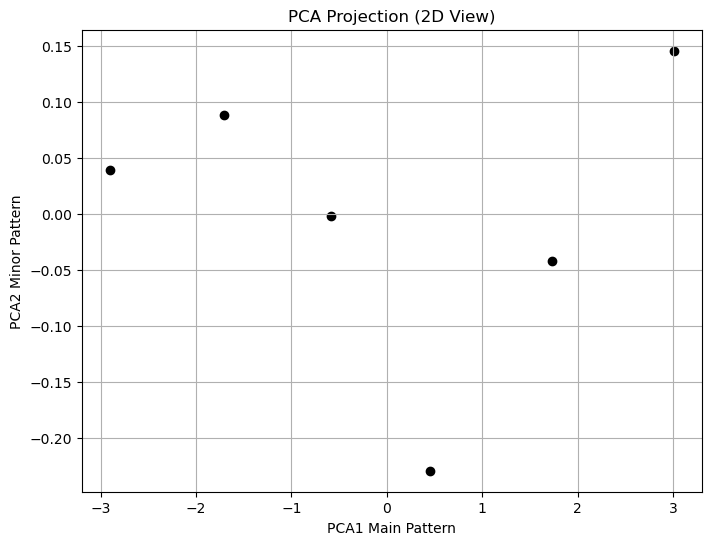

New Data with 2 features PCA1 PCA2
       PCA1      PCA2
0 -2.901838  0.038962
1 -1.703939  0.088054
2 -0.585677 -0.001447
3  0.452949 -0.229542
4  1.730485 -0.041856
5  3.008020  0.145829


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = {
    'Age' : [25, 30, 35, 40, 45, 50],
    'Income' : [30000, 40000, 50000, 60000, 70000, 80000],
    'Spending' : [70, 60, 50, 40, 30, 20],
    'Savings' : [1000, 5000, 8000, 10000, 15000, 20000]
}
df = pd.DataFrame(data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# print(scaled_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result,columns=['PCA1','PCA2'])
explained_varience = pca.explained_variance_ratio_
print('Varience Captured by each PCA Component :')
print(np.round(explained_varience*100,2))
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'],pca_df['PCA2'],color='black')
plt.title('PCA Projection (2D View)')
plt.xlabel('PCA1 Main Pattern')
plt.ylabel('PCA2 Minor Pattern')
plt.grid(True)
plt.show()

print('New Data with 2 features PCA1 PCA2')
print(pca_df)

In [ ]:
'''
Topics covered: Unsupervised Learning, Mean/Centroid, Distance (Euclidean),
Variance/Spread, Basic Linear Algebra, and Graph Plotting.

UNSUPERVISED LEARNING

Definition: Learning when machine is given unlabeled data.
The machine finds hidden patterns and groups similar items (Clustering).
Examples: Shopping mall customer grouping by budget, Netflix movie recommendations.

CLUSTERING

Grouping similar things together even without labels.
Value Prediction: Clustering does NOT predict values; it groups similar data points.

Difference from Supervised Learning:
Supervised: Questions + Answers (Labels).
Unsupervised: No Labels/Answers. Model learns from raw data patterns.

MEAN & CENTROID

MEAN: Mathematical average center value of a list of numbers.
Formula: Sum of all values / Total count.

CENTROID: Middle point of dots (data points) in a multi-dimensional graph.
Used in K-Means to find the "typical" member of a group.

DISTANCE (EUCLIDEAN DISTANCE)

Definition: Measures how far one person/point is from another.
Closer distance = Higher similarity.
Formula: sqrt((x2-x1)^2 + (y2-y1)^2).

Applications: Amazon recommendations, Dating apps, Medical diagnosis.

VARIANCE & SPREAD

SPREAD: How far apart data points are from each other.
VARIANCE: Mathematical term for spread.

Machine Learning Perspective: High variance features usually carry more information.

Principal Component Analysis (PCA): Used to compress large Excel sheets while
keeping features with high variance.

VARIANCE FORMULA

Variance = [(x1-mean)^2 + (x2-mean)^2 + ... + (xn-mean)^2] / n
Squaring is done to ensure all values become positive.

BASIC GRAPHING

Visualizing patterns (e.g., Age on X-axis vs. Spending on Y-axis).
Patterns often emerge visually (e.g., as Age increases, Spending increases).

LINEAR ALGEBRA – VECTORS

VECTOR: An arrow pointing in a specific direction.
Used in PCA to find directions where data changes the most (Strongest Trends).
PCA removes "Noise" and keeps "Important Directions".

SECOND PHASE: K-MEANS & PCA

K-MEANS CLUSTERING

Groups unlabeled customer data automatically.
Goal: Computer should figure out groups (Clusters) without being told labels.

K-MEANS FIVE STEP PROCESS

Tell machine the value of K (Number of groups).

Drop K random points (Centroids/Group Leaders).

Points join the nearest centroid.

Move Centroids to the actual center of their groups.

Repeat until grouping settles and no one switches.

ELBOW METHOD

Used to find the best value for K (Number of clusters).
X-axis: Number of clusters.
Y-axis: Inertia (Error).
The point where the curve bends like an elbow is the best K.

PCA (PRINCIPAL COMPONENT ANALYSIS)

Summarizes many features (columns) into fewer ones without losing major info.
Solves 3 problems: Slow training, visualization difficulty, and Overfitting.

DIMENSIONALITY REDUCTION: Reducing input features while keeping the meaning.

FEATURE SCALING (STANDARD SCALER)

Important before PCA so features are treated equally.
Prevents large numbers (like Income 30,000) from dominating small ones (like Age 25).

Z-Score Formula: (x - mean) / standard_deviation.

FINAL PHASE: MINI PROJECT STEPS

Load & Understand Data (Check shape, info, nulls).

Pre-processing (Clean data, Categorical -> Numeric).

Feature Scaling (Bring columns to same range).

Split Data (Train vs. Test set – usually 80/20).

Train Model (Machine learns patterns).

Prediction (Make guesses on unseen data).

Evaluate Model (Accuracy score, Confusion Matrix).

Visualize Results (Charts/Graphs).

Experiment (Try different models).

Document & Save (Clean code, save model).

'''